In [1]:
import math
import torch
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


from csi.multivar_trace import *

In [2]:
N = 10000  # sample size
D = 2  # embedding dimension
H = 3  # hidden state dimension

In [3]:
np.random.seed(42)

z = Nz = np.random.normal(1, 5, (N, D))
w = Nw = np.random.normal(1, 5, (N, D))

Wzx = np.random.randn(H, D)
Nzx = np.random.normal(0, 1, (N, H))
Hzx = z.dot(Wzx.T) + Nzx

Wx = np.random.randn(D, 1 * H)
Nx = np.random.normal(0, 1, (N, D))
x = np.concatenate([Hzx]).dot(Wx.T) + Nx

Wxy = np.random.randn(H, D)
Nxy = np.random.normal(0, 1, (N, H))
Hxy = x.dot(Wxy.T) + Nxy

Wwy = np.random.randn(H, D)
Nwy = np.random.normal(0, 1, (N, H))
Hwy = w.dot(Wwy.T) + Nwy

Wy = np.random.randn(D, 2 * H)
Ny = np.random.normal(0, 1, (N, D))
y = np.concatenate([Hxy, Hwy], axis=1).dot(Wy.T) + Ny

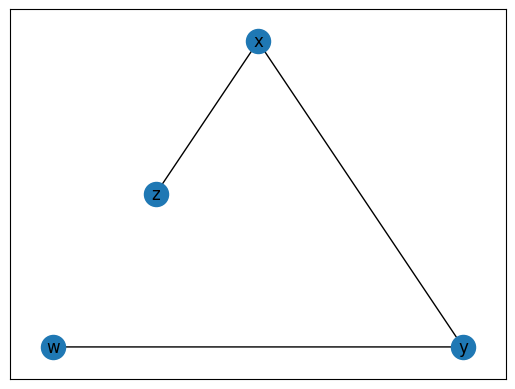

In [13]:
graph = build_graph([
    ("w", "y", None),
    ("x", "y", None),
    ("z", "x", None),
])

draw_graph(graph)

In [15]:
scores = get_scores(
    graph,
    node_samples={"x": x, "y": y, "z": z, "w": w},
    H=H,
    regress_opts={
        "batch_size": 1000,
        "n_epoch_logs": 3,
        "epochs": 500,
    },
)

scores

{('w', 'y'): [0.493742517739957, 0.3391421644744644],
 ('x', 'y'): [0.6231092649734014, 0.341834733815844],
 ('z', 'x'): [0.49717785037138784, 0.32099611871943345]}

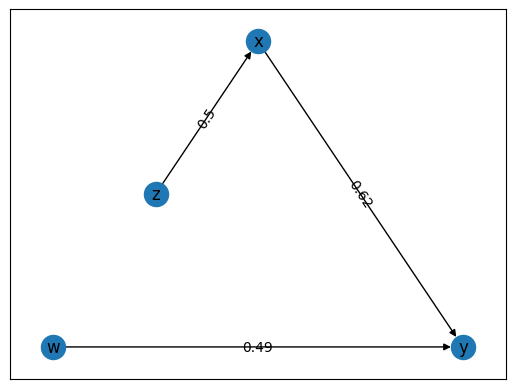

In [16]:
draw_graph(adjusted_graph(graph, {}, scores), edge_attr="score", map_edge_labels=lambda x: round(x,2))